# Titanic Classification

EDA

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [117]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [118]:
test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [119]:
train.shape


(891, 12)

In [120]:

test.shape

(418, 11)

In [121]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [122]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [123]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [124]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [125]:
train.dropna(inplace = True)
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [126]:
test.dropna(inplace = True)
test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [127]:
# check for duplicates
train.duplicated().sum()

0

In [128]:
train.duplicated().sum()

0

In [129]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,455.366120,0.672131,1.191257,35.674426,0.464481,0.475410,78.682469
std,247.052476,0.470725,0.515187,15.643866,0.644159,0.754617,76.347843
min,2.000000,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,263.500000,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000
50%,457.000000,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000
75%,676.000000,1.000000,1.000000,47.500000,1.000000,1.000000,90.000000
max,890.000000,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


In [130]:
pd.crosstab(train.Sex, train.Survived) 

Survived,0,1
Sex,,
female,6,82
male,54,41


More females survived than males. This is a critical relationship and We should keep the variables for modeling

Encoding Categorical variables

In [131]:
# encoding 'Sex'
from sklearn.preprocessing import LabelEncoder

le_Sex = LabelEncoder().fit(train.Sex.unique())
classes_Sex = le_Sex.classes_
train['Sex'] = le_Sex.transform(train.Sex.values)

In [132]:
# encoding Cabin	
le_cabin = LabelEncoder().fit(train.Cabin.unique())
classes_cabin = le_cabin.classes_
train['Cabin'] = le_cabin.transform(train.Cabin.values)

In [133]:
# encoding Embarked
le_Embarked = LabelEncoder().fit(train.Embarked.unique())
classes_Embarked = le_Embarked.classes_
train['Embarked'] = le_Embarked.transform(train.Embarked.values)

In [134]:
# encoding Ticket
le_Ticket = LabelEncoder().fit(train.Ticket.unique())
classes_Ticket = le_Ticket.classes_
train['Ticket'] = le_Ticket.transform(train.Ticket.values)

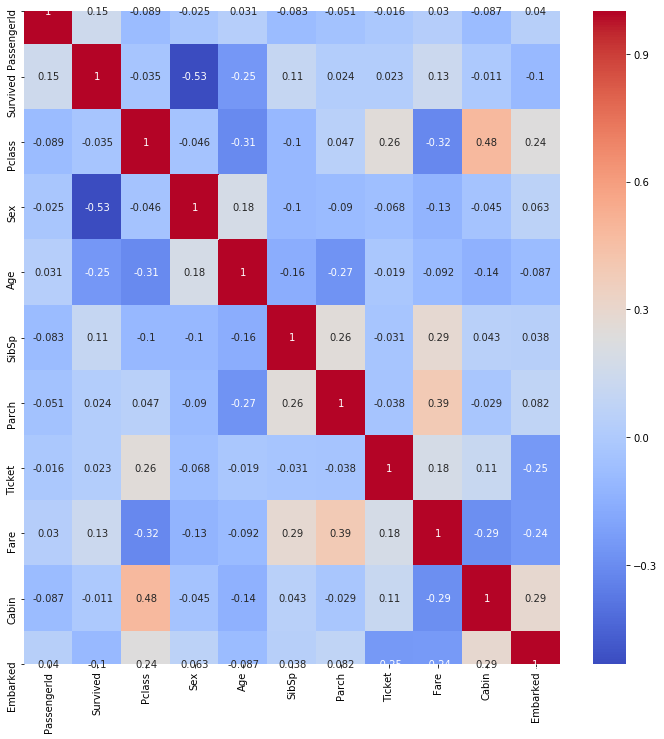

In [135]:
# checking the correlations between the numerical variables
corr = train.corr()

# plotting the correlations onto a heatmap
plt.figure(figsize = (12, 12))
sns.heatmap(corr, annot = True, cmap = 'coolwarm')
plt.show()

Visualization of correlation

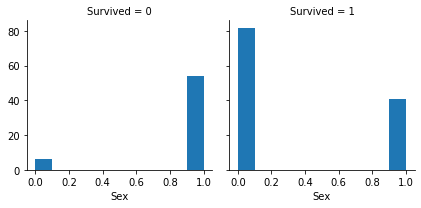

In [136]:
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Sex', bins=10)

# Data modeling

In [137]:
# split into features (X) and target (Y)
X = train.drop(columns = ['Survived','Name']).values
y = train.Survived.values

print(X.shape)
print(y.shape)

(183, 10)
(183,)


In [138]:
# splitting into 75-25 training and test sets
from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test = tts(X, y, test_size = .25, random_state = 0, stratify = y)

In [139]:
# scaling our features
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test= sc.transform(X_test)

In [140]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)


In [141]:
# evaluating the classification reports and confusion matrices of each classifier
from sklearn.metrics import classification_report, confusion_matrix


# Naive Bayes
print("Naive Bayes Confusion Matrix:\n", confusion_matrix(y_test, nb_pred))
print("Classification Report:\n", classification_report(y_test, nb_pred))
print()



Naive Bayes Confusion Matrix:
 [[10  5]
 [ 8 23]]
Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.67      0.61        15
           1       0.82      0.74      0.78        31

    accuracy                           0.72        46
   macro avg       0.69      0.70      0.69        46
weighted avg       0.73      0.72      0.72        46




The model is 72% accurate

## Glass Classification


### Content
Attribute Information:

Id number: 1 to 214 (removed from CSV file)                                                                      
RI: refractive index                                                                                                          
Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)                                  
Mg: Magnesium                                                                                                                   
Al: Aluminum                                                                                                                  
Si: Silicon                                                                              
K: Potassium                                                                              
Ca: Calcium                                                                              
Ba: Barium                                                                              
Fe: Iron                                                                              
Type of glass: (class attribute) -- 1 building_windows_float_processed -- 2 building_windows_non_float_processed -- 3 vehicle_windows_float_processed -- 4 vehicle_windows_non_float_processed (none in this database) -- 5 containers -- 6 tableware -- 7 headlamps

In [142]:
import numpy as np
import pandas as pa
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
from sklearn.utils import shuffle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# to display all columns
pd.set_option('display.max.columns', None)

# to display the entire contents of a cell
pd.set_option('display.max_colwidth', None)


from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')

color = sn.color_palette()
sn.set_style('darkgrid')
import matplotlib.style as style
#style.use('seaborn-poster') #sets the size of the charts
style.use('ggplot')
import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.color'] = 'r'

ValueError: Value must have type '<class 'int'>'

In [143]:
df = pa.read_csv('glass.csv')
df = shuffle(df)
print("Glass data has total {} data".format(len(df)))

Glass data has total 214 data


In [144]:
train_data = df[0:205]
test_data = df[205:]
df = train_data

### Descriptive Analytics

In [145]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,1.518351,13.414878,2.665024,1.450927,72.655366,0.499073,8.952390,0.182732,0.055122,2.824390
std,0.003036,0.808066,1.451006,0.501659,0.775357,0.664315,1.412353,0.506678,0.095674,2.134771
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516550,12.930000,1.880000,1.190000,72.320000,0.120000,8.270000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.550000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.810000,3.600000,1.630000,73.090000,0.610000,9.140000,0.000000,0.090000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [146]:
type_data = df['Type'].value_counts()
type_data = type_data.sort_index(axis=0)
type_data = pa.DataFrame({'Count':type_data.values,'Label':type_data.index})
type_data.index = ['building_windows_float_processed','building_windows_non_float_processed',
                   'vehicle_windows_float_processed','containers',
                   'tableware','headlamps']

#### Draw box plot for all the numeric features to understand if there is any outliers and check the variablity of the data 

In [147]:
features = list(df.columns)
features.remove('Type')

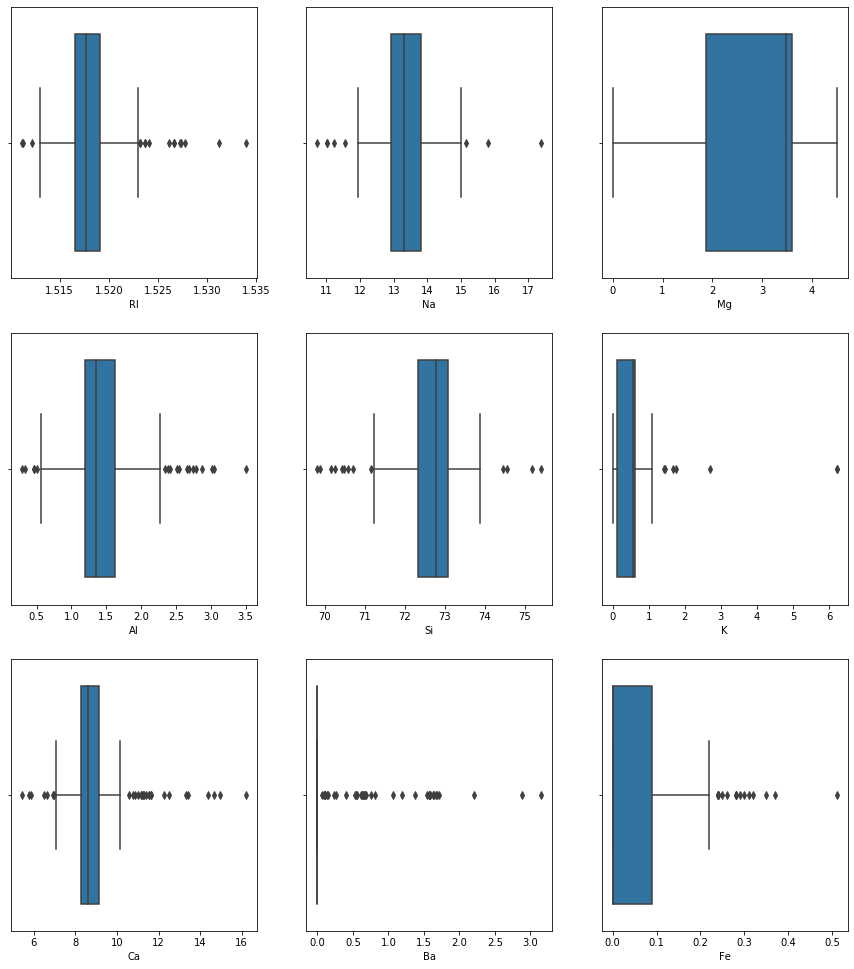

In [148]:
plt.figure(figsize=(15,17))

for i in range(1, 10):
    plt.subplot(3, 3, i)
    sn.boxplot(df[features[i-1]])

In [150]:
from collections import Counter
def get_ouliers(data):
    outliers = []
    
    # iterate over features(columns)
    for col in data.columns.tolist():
        # 1st quartile (25%)
        Q1 = np.percentile(data[col], 25)
        
        # 3rd quartile (75%)
        Q3 = np.percentile(data[col],75)
        
        # Interquartile rrange (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_range = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outliers_values = data[(data[col] < Q1 - outlier_range) | (data[col] > Q3 + outlier_range)].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outliers.extend(outliers_values)
        
    # select observations containing more than 2 outliers
    #print(outliers)
    outliers = Counter(outliers)
    #print(outliers)
    multiple_outliers = list( k for k, v in outliers.items() if v > 3 )
    
    return multiple_outliers   

print('The dataset contains %d observations with more than 2 outliers' %(len(get_ouliers(df[features]))))   

The dataset contains 8 observations with more than 2 outliers


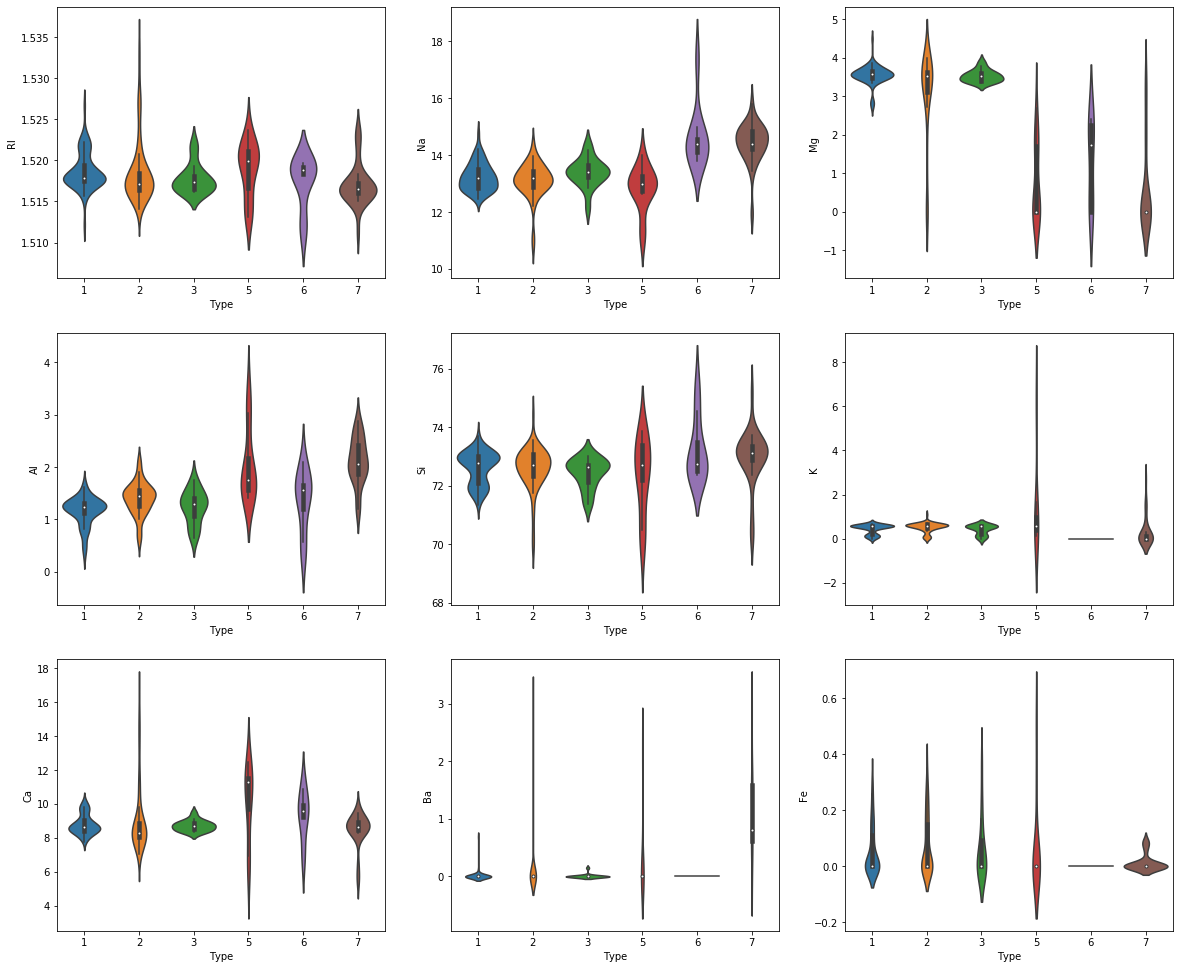

In [151]:
plt.figure(figsize=(20,17))

for i in range(1, 10):
    ax=plt.subplot(3, 3, i)
    ax=sn.violinplot(x='Type',y=df[features[i-1]],data=train_data)

### Data Transformation

#### Remove the ouliers

In [152]:
outliers_index = get_ouliers(df[features])
df = df.drop(outliers_index)

#### Check the distribution of each numerical features and check it's skewness and kurtosis values

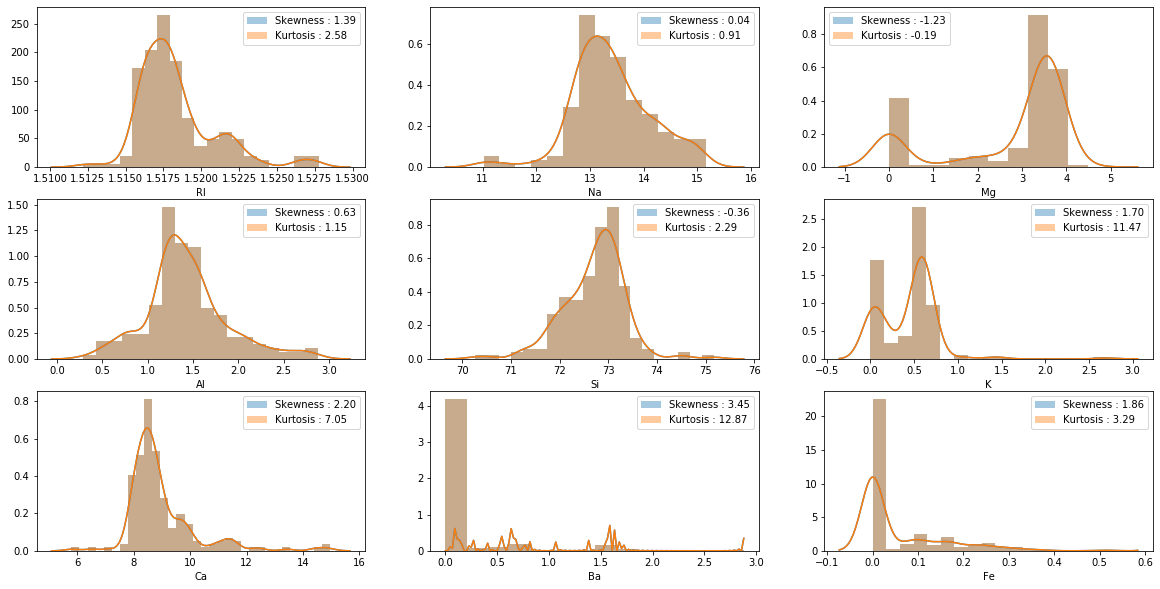

In [153]:
plt.figure(figsize=(20,10))

for i in range(1, 10):
    ax=plt.subplot(3, 3, i)
    ax=sn.distplot(df[features[i-1]],label='Skewness : %.2f'%df[features[i-1]].skew())
    ax=sn.distplot(df[features[i-1]],label='Kurtosis : %.2f'%df[features[i-1]].kurtosis())

    plt.legend(loc='best')

Here we can see no features are normally distriburted so we have to transform this data I am using box cox transfomation for this  

Here we can see that box cox transformation performed well in reducing the skewness but most of features is still skewed. If we compare this with standard scaler,  standard scaler performd way much better in accuracy so I will be appplying standard scaler for normalizing the features.

### Data Modelling

In [154]:

# split into features (X) and target (Y)
X = df.drop(columns = ['Type']).values
y = df.Type.values

print(X.shape)
print(y.shape)

(197, 9)
(197,)


In [155]:
# splitting into 75-25 training and test sets
from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test = tts(X, y, test_size = .25, random_state = 0, stratify = y)

In [156]:
# scaling our features
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test= sc.transform(X_test)

In [157]:

# Support Vector Machine
from sklearn.svm import SVC
svm = SVC(kernel = 'rbf')
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)




In [158]:
# evaluating the classification reports and confusion matrices of each classifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# Support Vector Machine
print("Support Vector Machine Confusion Matrix:\n", confusion_matrix(y_test, svm_pred))
print("Classification Report:\n", classification_report(y_test, svm_pred))
print()




# Naive Bayes
print("Naive Bayes Confusion Matrix:\n", confusion_matrix(y_test, nb_pred))
print("Classification Report:\n", classification_report(y_test, nb_pred))
print()



Support Vector Machine Confusion Matrix:
 [[14  3  0  0  0  0]
 [ 5 11  0  0  1  0]
 [ 1  3  0  0  0  0]
 [ 0  2  0  1  0  0]
 [ 0  1  0  0  1  0]
 [ 0  1  0  0  0  6]]
Classification Report:
               precision    recall  f1-score   support

           1       0.70      0.82      0.76        17
           2       0.52      0.65      0.58        17
           3       0.00      0.00      0.00         4
           5       1.00      0.33      0.50         3
           6       0.50      0.50      0.50         2
           7       1.00      0.86      0.92         7

    accuracy                           0.66        50
   macro avg       0.62      0.53      0.54        50
weighted avg       0.64      0.66      0.63        50


Naive Bayes Confusion Matrix:
 [[6 2 9 0 0 0]
 [7 5 2 2 1 0]
 [1 1 2 0 0 0]
 [0 1 0 2 0 0]
 [0 0 0 0 1 1]
 [0 0 0 0 0 7]]
Classification Report:
               precision    recall  f1-score   support

           1       0.43      0.35      0.39        17
        

C:\Users\Velamuri\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [159]:
svm = accuracy_score(y_test,svm_pred)
svm

0.66

In [160]:
nb = accuracy_score(y_test,nb_pred)
nb

0.46

##### Classification report on test data using Support Vector Machine performed better than better than Naive Bayes. SVM performs better because of the way it chooses the decision boundary that maximizes the distance from the nearest data points of all the classes.
---


###### Lets check how the data is related and scattered using pairplot 

<Figure size 1080x504 with 0 Axes>

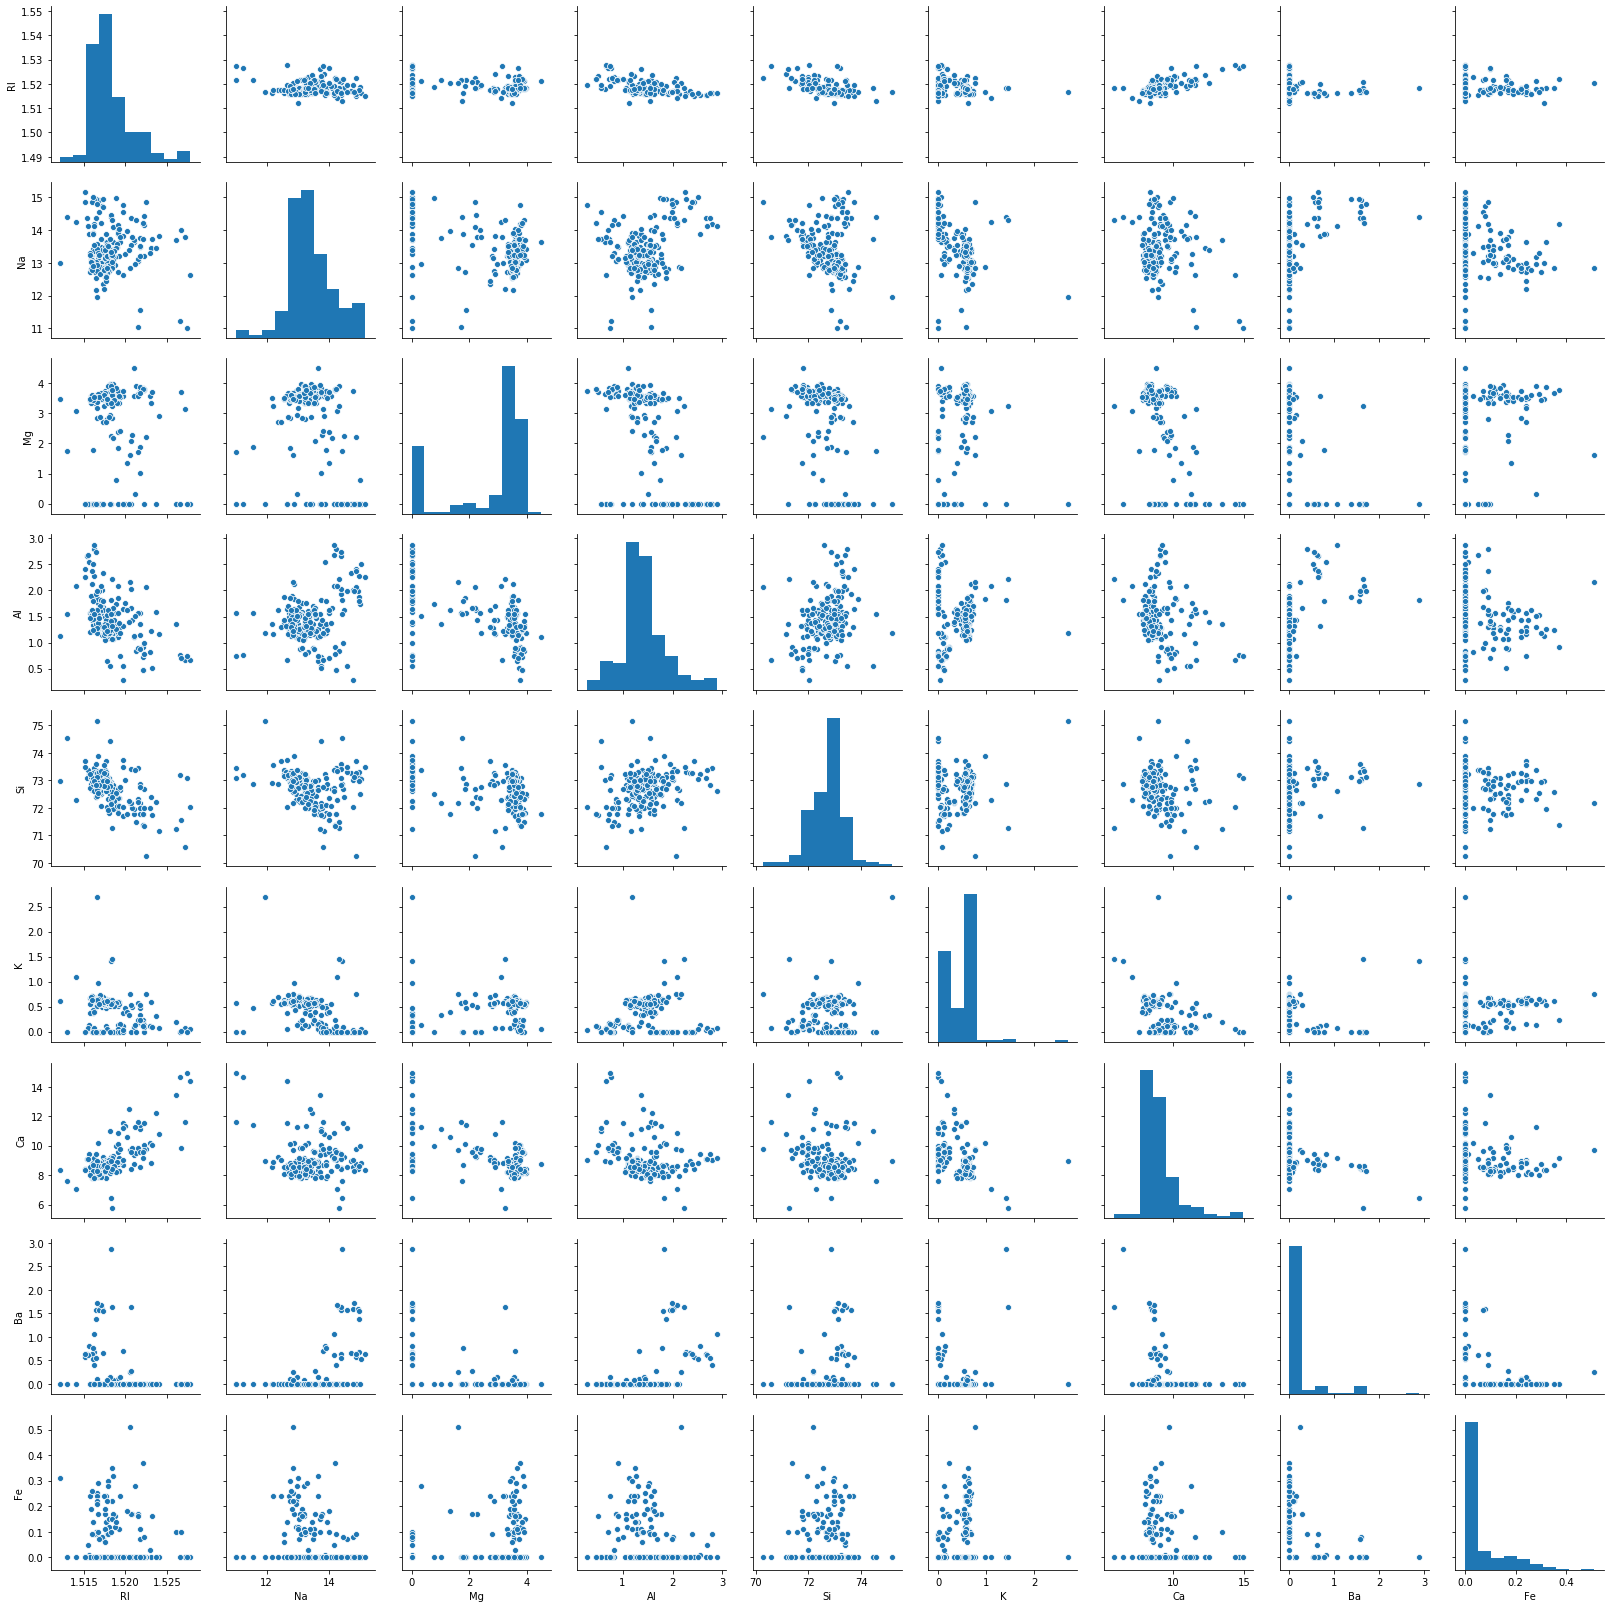

In [161]:
plt.figure(figsize=(15,7))
sn.pairplot(df[features])

It can be seen that Ri and Ca has a strong positive relation among each other

#### Let's check the co-relation between each items for better understanding

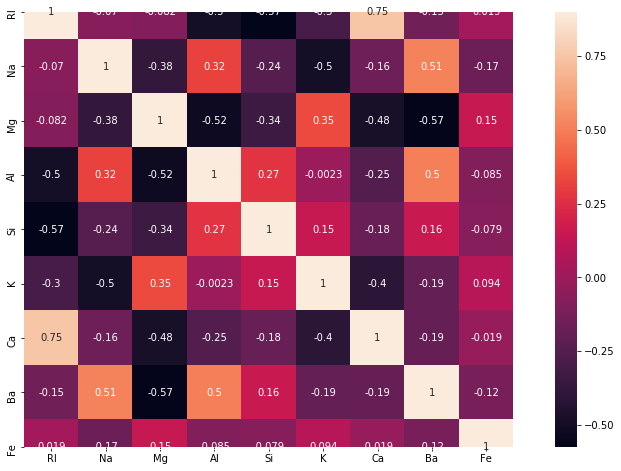

In [163]:
corr  = df[features].corr()
plt.figure(figsize=(15,8))
sn.heatmap(corr,annot=True,vmax=0.9, square=True)

 Here we can see there is no multico-liearity among features (I am chossing a cut-off -> 0.9) 